# Introduction

Create "ground truth" OCR data using Gemini on the SROIE 2019 dataset.

In [1]:
from dotenv import load_dotenv
from PIL import Image
from google import genai
from google.genai import types
from tqdm.auto import tqdm

import time
import glob
import os

In [2]:
load_dotenv()

True

In [3]:
all_images = glob.glob('../input/sroie2019/0325updated.task1train(626p)/*.jpg')

In [4]:
print(len(all_images))

712


In [5]:
sample = Image.open(all_images[0])

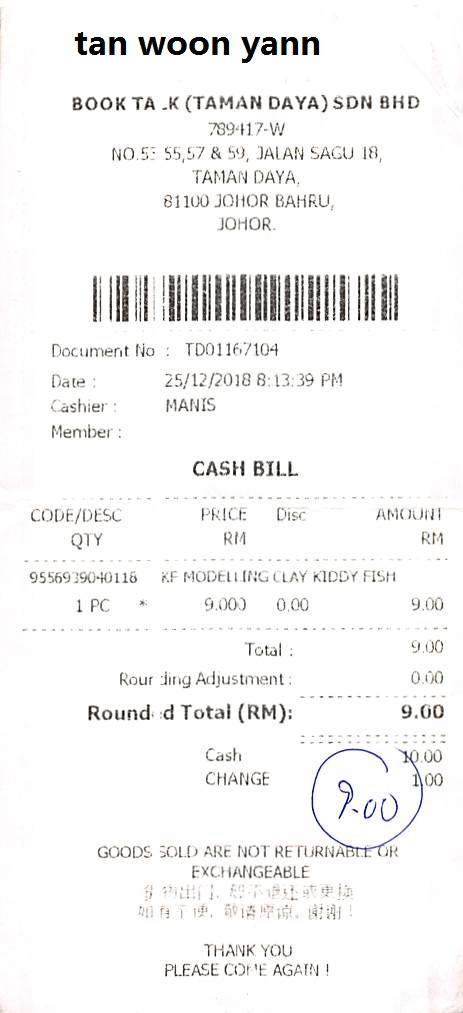

In [6]:
sample

In [7]:
# Sample call.
client = genai.Client(api_key=os.getenv('GEMINI_API'))
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=["OCR this image. Do not give any other content", sample]
)

In [8]:
print(response)
print('#'*50)
print(response.text)

candidates=[Candidate(content=Content(parts=[Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=None, file_data=None, function_call=None, function_response=None, inline_data=None, text='tan woon yann\nBOOK TAK (TAMAN DAYA) SDN BHD\n789417-W\nNO.53 55,57 & 59, JALAN SAGU 18,\nTAMAN DAYA,\n81100 JOHOR BAHRU,\nJOHOR.\nDocument No: TD01167104\nDate: 25/12/2018 8:13:39 PM\nCashier: MANIS\nMember:\nCASH BILL\nCODE/DESC PRICE Disc AMOUNT\nQTY RM RM\n9556939040118 KF MODELLING CLAY KIDDY FISH\n1 PC * 9.000 0.00 9.00\nTotal: 9.00\nRour ding Adjustment: 0.00\nRounded Total (RM): 9.00\nCash 10.00\nCHANGE 1.00\n9.00\nGOODS SOLD ARE NOT RETURNABLE OR\nEXCHANGEABLE\n食物出门,恕不退还或更换\n如有不便,敬请原谅,谢谢!\nTHANK YOU\nPLEASE CONE AGAIN!')], role='model'), citation_metadata=CitationMetadata(citations=[Citation(end_index=354, license=None, publication_date=None, start_index=59, title=None, uri='https://github.com/InfinitasFish/auto_receipt_expenses_report')]), finish_message=None, 

In [9]:
os.makedirs('gemini_ocr_result', exist_ok=True)

In [10]:
with open(os.path.join('gemini_ocr_result', all_images[0].split(os.path.sep)[-1].split('.jpg')[0]+'.txt'), 'w') as f:
    f.write(response.text)

In [11]:
for image_path in tqdm(all_images, total=len(all_images)):
    image = Image.open(image_path)

    response = client.models.generate_content(
        model='gemini-2.0-flash',
        contents=['OCR this image. Do not give any other content', image]
    )

    with open(os.path.join('gemini_ocr_result', image_path.split(os.path.sep)[-1].split('.jpg')[0]+'.txt'), 'w') as f:
        f.write(response.text)

    time.sleep(5)

  0%|          | 0/712 [00:00<?, ?it/s]